<a href="https://colab.research.google.com/github/faizz10/datascience/blob/main/program13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df=pd.read_csv('/content/Wine_Quality.csv')
print(df.head())
print(df.isnull().sum())
print(df.describe())
print(df['quality'].value_counts())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

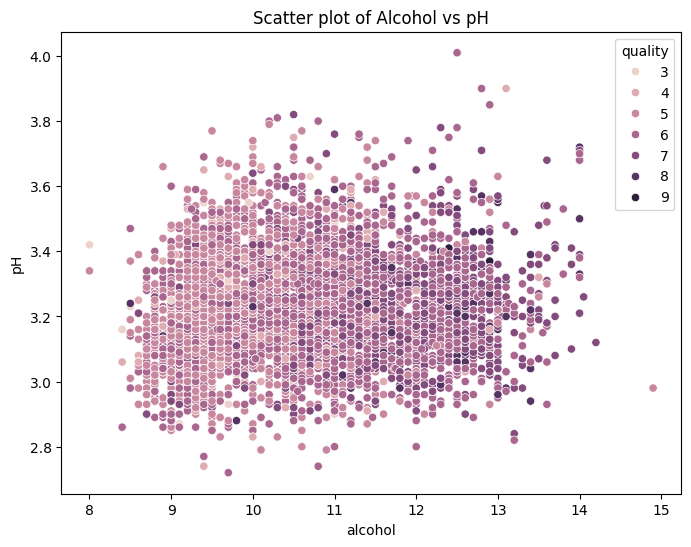

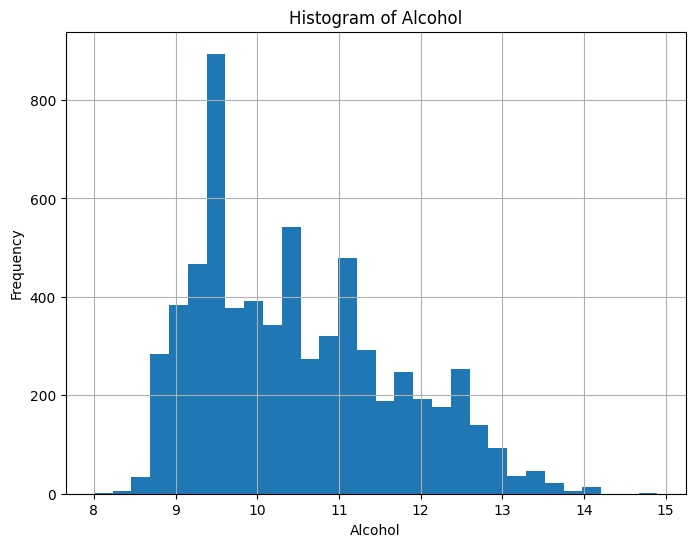

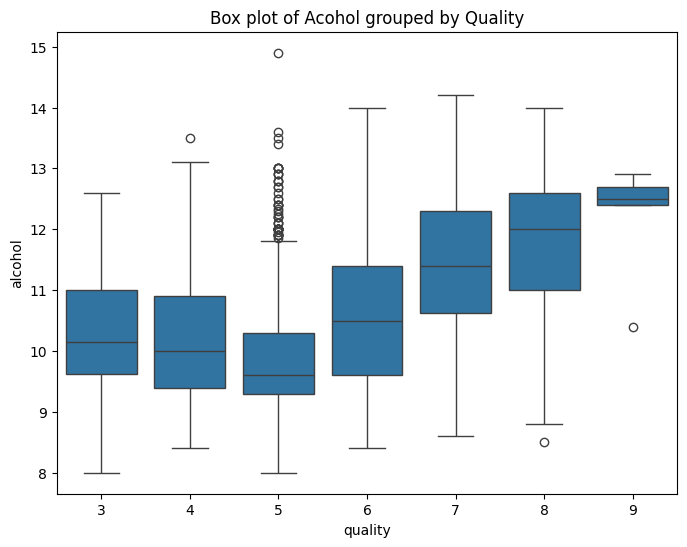

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# (i)Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol',y='pH',hue='quality',data=df)
plt.title("Scatter plot of Alcohol vs pH")
plt.show()

# (ii)Histogram
plt.figure(figsize=(8,6))
df['alcohol'].hist(bins=30)
plt.title("Histogram of Alcohol")
plt.xlabel("Alcohol")
plt.ylabel("Frequency")
plt.show()

# (iii)Box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='quality',y='alcohol',data=df)
plt.title("Box plot of Acohol grouped by Quality")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df_cleaned=df.dropna()
X=df_cleaned.drop(['quality','type'],axis=1)
y=df_cleaned['quality']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

k_values=[1,3,5,7,9,11,13,15]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled,y_train)
  y_pred=knn.predict(X_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Accuracy with k={k}:{accuracy:.4f}")

k_values_input=input("Enter k values:")
k_values=[int (k.strip()) for k in k_values_input.split('.')]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled,y_train)
  y_pred=knn.predict(X_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  print(f"Accuracy with k={k}: {accuracy:.4f}")

accuracy=accuracy_score(y_test,y_pred)*100
print(f"\nAccuracy: {accuracy:.2f}%")

Accuracy with k=1:0.6226
Accuracy with k=3:0.5538
Accuracy with k=5:0.5584
Accuracy with k=7:0.5313
Accuracy with k=9:0.5445
Accuracy with k=11:0.5491
Accuracy with k=13:0.5483
Accuracy with k=15:0.5429
Enter k values:4
Accuracy with k=4: 0.5615

Accuracy: 56.15%
